In [258]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

from CubeView import CubeView
from SMAdapter import SMAdapter
from DirectCube import DirectCube

from CyclicSolver import CyclicSolver
from DirectSolver import DirectSolver
from FaceletSolver import FaceletSolver

from UCTNode import UCTNode, HeuristicState
from CfopState import CfopState, FullCubeState, CrossState, F2LState, F2LStateEntropy, OLLState, PLLState
from VectorCube import VectorCube, color_name, color_letr, WHITE_CB, ORANGE_CB, GREEN_CB, RED_CB, BLUE_CB, YELLOW_CB, SIDES

## Project: rubiks-cube 

This project is a collection of Python classes developed to explore algorithmic solutions to Rubik's Cube. The repository contains a set of notebooks to walk interested parties through my progress with the puzzle thus far, and highlight some features of the classes for modeling and displaying the cube contained herein. For a preliminary and complete explanation of my solution strategies thus far, please peruse the blog article referenced above.

___


### Installation:

The repository is setup for pipenv configuration management, thus you'll find a Pipfile rather than requirements.txt file.  
You may access installation instructions for pipenv here: [Pipenv Installation Instructions](https://pypi.org/project/pipenv/)

Once pipenv has been successfully installed, the following commands may be executes to install the rubiks-cube project:

```
$ git clone https://github.com/ajdonich/rubiks-cube
$ cd rubik-cube
$ pipenv install
$ pipenv --dev install
```

___


### Execution:

To understand the specifics of this project, please step through the interactive set of IPython/Jupyter notebooks provided. First, launch a notebook session from the command line using:

```
$ pipenv shell
$ jupyter lab
```

Then from within the notebook session that is launched in your browser, navigate to the notebooks directory. This directory contains this set of .ipynb files:

1. Nb1_Intro_Cube_View.ipynb
2. Nb2_Neural_Networks.ipynb
3. Nb3_CFOP_Algorithm.ipynb
4. Nb4_Cycles_Entropy.ipynb

Please step through these files, titled numerical with the suggested running order. Execute each cell of each notebook in turn, exploring the code execution output. You'll also find a number of markdown cells with further descriptive details. I hope you find the demonstrations interesting and enjoyable! 



In [259]:
csolver = CyclicSolver()

In [260]:
starting_cube = DirectCube()
moves, invmoves = starting_cube.trace_scramble(sz=20, apply_moves=True)
starting_hstate = DirectSolver.generate_hstate(starting_cube)
print(f"Starting Cube: [heuristic: {starting_hstate}]")
CubeView(starting_cube).draw_projection()

{4, 5, 6, 7, 8}

In [ ]:
%%time
solved, moves, rootnode = DirectSolver.solve_cube(direct_cube, csolver)

In [ ]:
nmoves = 20

# ROLLOUT (explores cyclic moves)
for i, moves in enumerate(csolver.cycles):
#{
    applied_moves = []
    rollout_cube = DirectCube(cube)
    for j in range(nmoves if nmoves else len(moves)):
    #{
        a = time.time()
        mv = moves[j%len(moves)]
        applied_moves.append(mv)
        rollout_cube.rotate(mv)
        rot_time.append(time.time() - a)

        b = time.time()
        k = tuple(rollout_cube.state())
        if k not in rollout_cache:
            rollout_cache[k] = heuristic_fcn(rollout_cube)
            if rollout_cache[k] > best_value:
                best_value = rollout_cache[k]
                best_moves = list(applied_moves)
                best_state = rollout_cube.state()
                is_new_best_state = True
        h_time.append(time.time() - b)
    #}
#}

In [ ]:
cube_dict = {}
cube = VectorCube()
pos_cn = cube.facelet_matrix[2:,0]
pos_ed = cube.facelet_matrix[2:,1]

for i in range(10000):
#{
    cube.scramble()
    diff_sq = (pos_cn - pos_ed)**2
    if sum(np.logical_or(np.logical_or((diff_sq == [4,0,0]), (diff_sq == [0,4,0])), (diff_sq == [0,0,4]))) == 3:
        cube_dict[tuple(np.concatenate((pos_cn, pos_ed)))] = cube.state()
#}
    

In [ ]:
view = CubeView(VectorCube())
for i, k in enumerate(cube_dict.keys()):
    view.viewable_cube.reset(state=cube_dict[k])
    view.push_snapshot(caption=f"{i+1}", flet_idx=[0,1])

view.draw_snapshots()

In [ ]:
def descend(cube, f1, f2, depth=0):
#{
    if depth < 2:
    #{
        for mv in VectorCube.MOVES:
            cube = VectorCube(cube).rotate(mv)
            cn_mat = np.broadcast_to(cube.facelet_matrix[2:,0].reshape((3,1)), (3,54))
            ed_mat = np.broadcast_to(cube.facelet_matrix[2:,1].reshape((3,1)), (3,54))
            f1.append(np.nonzero(sum(other_cube.facelet_matrix[2:] == cn_mat) == 3)[0][0])
            f2.append(np.nonzero(sum(other_cube.facelet_matrix[2:] == ed_mat) == 3)[0][0])
            descend(cube, f1, f2, depth+1)
    #}
#}

f1, f2 = [],[]
descend(VectorCube(), f1, f2)
print(f1)
print(f2)

In [ ]:
cube = VectorCube()
other_cube = VectorCube().scramble()
np.nonzero(sum(other_cube.facelet_matrix[2:] == np.broadcast_to(cube.facelet_matrix[2:,0].reshape((3,1)), (3,54))) == 3)[0][0]

In [ ]:
cube.facelet_matrix[2:,[0,1]].T

In [133]:
from CfopCube import CfopCube, CROSS, F2L

index = CfopCube.CFOP_IDXS[(CROSS, WHITE_CB)]
for cn_pair in CfopCube.CFOP_IDXS[(F2L, WHITE_CB)][:,:2]:
    print(index)
    index = np.concatenate((index, cn_pair))
    for depth in range(5):
        key = tuple((depth, tuple(cn_pair)))
        print(key)


[1 3 5 7]
(0, (38, 41))
(1, (38, 41))
(2, (38, 41))
(3, (38, 41))
(4, (38, 41))
[ 1  3  5  7 38 41]
(0, (36, 39))
(1, (36, 39))
(2, (36, 39))
(3, (36, 39))
(4, (36, 39))
[ 1  3  5  7 38 41 36 39]
(0, (18, 21))
(1, (18, 21))
(2, (18, 21))
(3, (18, 21))
(4, (18, 21))
[ 1  3  5  7 38 41 36 39 18 21]
(0, (20, 23))
(1, (20, 23))
(2, (20, 23))
(3, (20, 23))
(4, (20, 23))


In [255]:
# def five_deep(cube, dstates, depth=0):
# #{
#     if depth < 5:
#     #{
#         for mv in VectorCube.MOVES:
#             cube = VectorCube(cube).rotate(mv)
#             five_deep(cube, dstates, depth+1)
#             if (cube.solved(flet_index=CfopCube.CFOP_IDXS[(CROSS, WHITE_CB)]) and 
#                 (tuple(VectorCube._facelet_matrix[2:, [38,41]].T.flatten()) != 
#                  tuple(cube.facelet_matrix[2:, [38,41]].T.flatten()))):
#                 dstates[depth].append(cube.state())
#     #}
# #}

# def five_deep(cube, dstates=None, depth=0):
# #{    
#     if dstates is None: dstates = {tuple((depth, tuple(cn_pair))): [] for cn_pair in 
#                                    CfopCube.CFOP_IDXS[(F2L, WHITE_CB)][:,:2] for depth in range(5)}

#     if depth < 5:
#     #{
#         for mv in VectorCube.MOVES:
#             mv_cube = VectorCube(cube).rotate(mv)
#             five_deep(mv_cube, dstates, depth+1)
#             index = CfopCube.CFOP_IDXS[(CROSS, WHITE_CB)]
#             for cn_pair in CfopCube.CFOP_IDXS[(F2L, WHITE_CB)][:,:2]:
#                 key = tuple((depth, tuple(cn_pair)))
#                 if (mv_cube.solved(flet_index=index)): dstates[key].append(mv_cube.state()) #; print(mv, index)
#                 index = np.concatenate((index, cn_pair))
#     #}
    
#     return dstates
# #}

def five_deep(cube=None, dstates=None, depth=0):
#{
    if cube is None: cube = VectorCube()
    if dstates is None: dstates = {tuple((depth, tuple(cn_pair))): [] for cn_pair in 
        CfopCube.CFOP_IDXS[(F2L, WHITE_CB)][:,:2] for depth in range(5)}

    if depth < 5:
    #{
        for mv in VectorCube.MOVES:
            mv_cube = VectorCube(cube).rotate(mv)
            five_deep(mv_cube, dstates, depth+1)
            index = CfopCube.CFOP_IDXS[(CROSS, WHITE_CB)]
            for cn_pair in CfopCube.CFOP_IDXS[(F2L, WHITE_CB)][:,:2]:
                key = tuple((depth, tuple(cn_pair)))
                if (mv_cube.solved(flet_index=index)): dstates[key].append(mv_cube.state()) #; print(mv, index)
                index = np.concatenate((index, cn_pair))
    #}

    return dstates
#}

In [256]:
%%time

# f2l_cube = VectorCube()
# CubeView(f2l_cube).draw_projection()
dstates = five_deep()

KeyboardInterrupt: 

In [216]:
for k, vals in dstates.items():
    print(k, len(vals))

(0, (38, 41)) 3
(1, (38, 41)) 24
(2, (38, 41)) 180
(3, (38, 41)) 1640
(4, (38, 41)) 15504
(0, (36, 39)) 3
(1, (36, 39)) 24
(2, (36, 39)) 174
(3, (36, 39)) 1552
(4, (36, 39)) 13986
(0, (18, 21)) 3
(1, (18, 21)) 24
(2, (18, 21)) 168
(3, (18, 21)) 1472
(4, (18, 21)) 12756
(0, (20, 23)) 3
(1, (20, 23)) 24
(2, (20, 23)) 162
(3, (20, 23)) 1394
(4, (20, 23)) 11660


11904


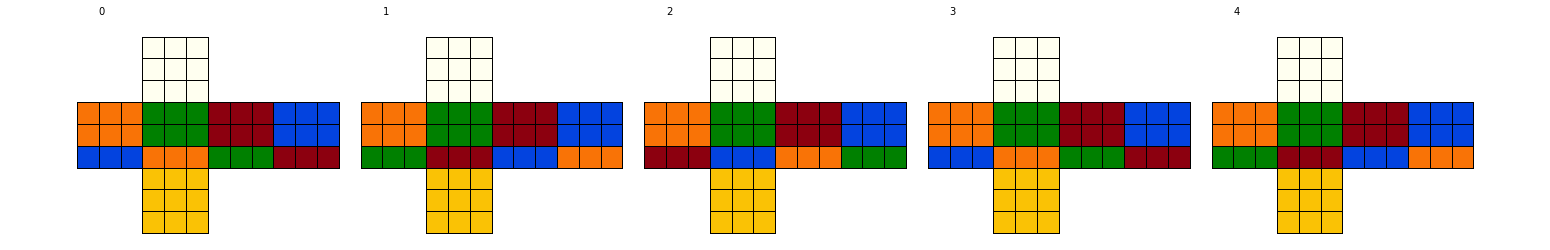

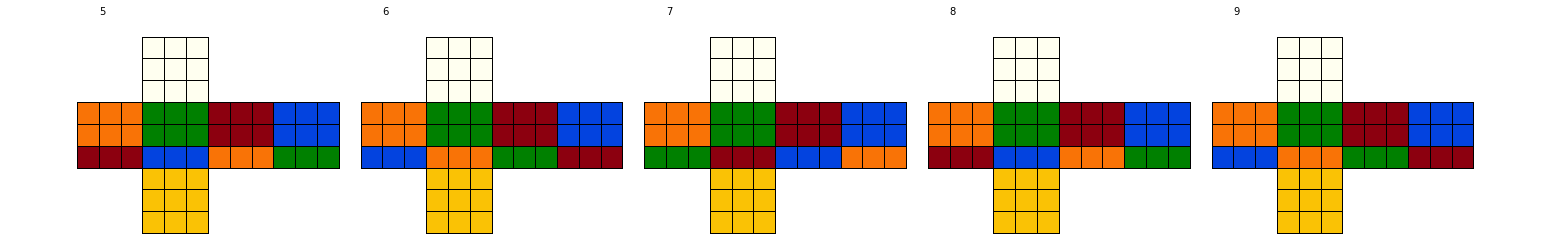

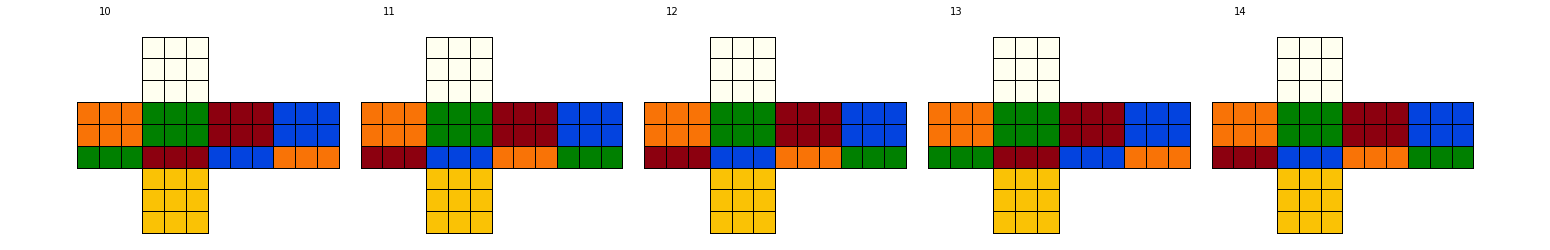

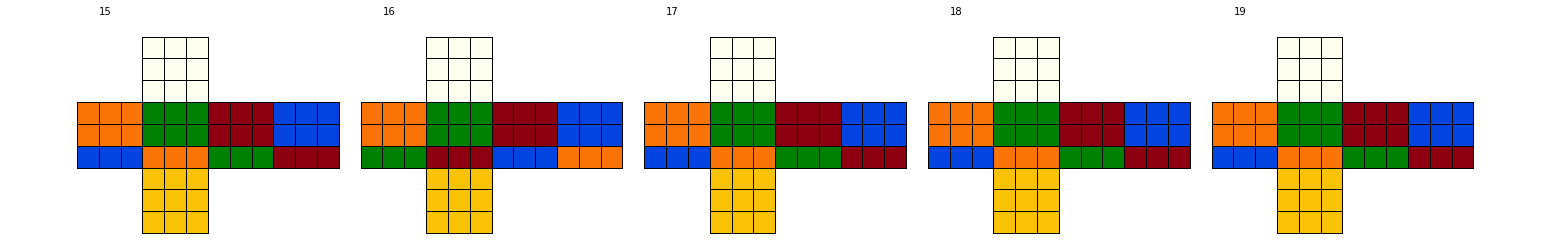

In [217]:
view = CubeView(VectorCube())

count = 0
key = (4, (38,41))
for i, state in enumerate(dstates[key]):
    view.viewable_cube.reset(state=state)
    if not view.viewable_cube.solved():
        if count < 20: view.push_snapshot(caption=f"{count}")
        count += 1

print(count)
view.draw_snapshots()

In [252]:
posdict = { k[1]: set() for k in dstates.keys() }
for k in dstates.keys():
    for state in dstates[k]: 
        posdict[k[1]].add(tuple(VectorCube().reset(state=state).
                                facelet_matrix[2:, k[1]].T.flatten()))

for k, posset in posdict.items(): print(k, len(posset))
pos_blocks = { k: np.zeros((len(posset),3,2), dtype=int) for k, posset in posdict.items() }

(38, 41) 91
(36, 39) 70
(18, 21) 53
(20, 23) 21


In [250]:
for k, posset in posdict.items():
    for i, pos_pair in enumerate(posset):
        pos_blocks[k][i,:,:] = np.array(pos_pair).reshape((2,3)).T
    
    print(k, pos_blocks[k].shape)
#     print(pos_blocks[k])

(38, 41) (91, 3, 2)
(36, 39) (70, 3, 2)
(18, 21) (53, 3, 2)
(20, 23) (21, 3, 2)


In [105]:
a = np.array([[-3,-3],[-2,-2],[2,0]])
b = np.array([[7,8],[9,10],[11,12]])
c = np.array([a,b])
c



array([[[-3, -3],
        [-2, -2],
        [ 2,  0]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [113]:
block = np.broadcast_to(VectorCube().facelet_matrix[2:, [38,41]], (2,3,2))
print(c == block)
sum(np.sum((c == block), axis=(1,2)) == 6) > 0

[[[ True  True]
  [ True  True]
  [ True  True]]

 [[False False]
  [False False]
  [False False]]]


True